# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 4: ML Applications - Vehicle Motion State Classification*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | First Name | Last Name | Signature | Hours | Contribution |
| Member 2: | Muhammad Ayan | Khan | Muhammad Ayan Khan, 28-11-2024| 2.5 | 25% |
| Member 3: | Ｇｒｅｔｃｈｅｎ | GE | Gｒｅｔｃｈｅｎ　ＧＥ | ３．５ | ２５Contribution |
| Member 4: | First Name | Last Name | Signature | Hours | Contribution |


---

## Section 1 - Motion Classification Using *All Features* Derived From Inertial Sensor Data (33 Marks)

---

### 1.1 Assignment datasets import (6 Marks)

---

In [ ]:
# some library imports
import pandas as pd

First load the following datasets into dataframes.
* *UrbanNav-HK_Whampoa-20210521_sensors.csv* to dataframe variable named *cv_set*. This dataset is to be used for model training and hyper parameter tuning.
* *UrbanNav-HK_TST-20210517_sensors.csv* to dataframe variable named *test_set1*. This is first independent test dataset.
* *2020-03-14-16-45-35.csv* to dataframe variable named *test_set2*. This is the second independent test dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# (2 marks)
# TODO: Load cross validation/training dataset (UrbanNav-HK_Whampoa-20210521_sensors.csv) to 'cv_set' dataframe

# uncomment and compelete below
cv_set = pd.read_csv('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment4/UrbanNav-HK_Whampoa-20210521_sensors.csv')

# TODO: Load UrbanNav-HK_TST-20210517_sensors.csv to 'test_set1' dataframe
test_set1 = pd.read_csv('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment4/UrbanNav-HK_TST-20210517_sensors.csv')

# TODO: Load 2020-03-14-16-45-35.csv to 'test_set2' dataframe
test_set2 = pd.read_csv('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment4/2020-03-14-16-45-35.csv')

For the *cv_set*, look at the dataframe head and info, and print the list of all columns. The *test_set1* and *test_set2* have the same schema as *cv_set*, however, have different number of rows (samples).

In [ ]:
# TODO: Display first two rows of cv_set
# (1 mark)
print(cv_set.head(2))

     ax_sum    ay_sum    az_sum    gx_sum    gy_sum    gz_sum     a_sum  \
0 -0.003929 -0.093081  9.789349 -0.002649  0.001406 -0.001391  9.797418   
1 -0.000966 -0.092417  9.789095 -0.001806  0.000103 -0.001943  9.798815   

      g_sum        ax_var        ay_var  ...     g_min    ax_max    ay_max  \
0  0.022554  8.046094e-07  1.319665e-07  ...  0.000003  0.001496  0.000544   
1  0.021731  1.032619e-06  1.073067e-07  ...  0.000006  0.001865  0.000615   

     az_max    gx_max    gy_max    gz_max     a_max     g_max  motion_state  
0  0.024992  0.000110  0.000075  0.000078  0.024997  0.000187          rest  
1  0.024828  0.000124  0.000098  0.000090  0.024829  0.000144          rest  

[2 rows x 33 columns]


In [ ]:
# TODO: Load the info method of cv_set
# (1 mark)
print(cv_set.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ax_sum        1534 non-null   float64
 1   ay_sum        1534 non-null   float64
 2   az_sum        1534 non-null   float64
 3   gx_sum        1534 non-null   float64
 4   gy_sum        1534 non-null   float64
 5   gz_sum        1534 non-null   float64
 6   a_sum         1534 non-null   float64
 7   g_sum         1534 non-null   float64
 8   ax_var        1534 non-null   float64
 9   ay_var        1534 non-null   float64
 10  az_var        1534 non-null   float64
 11  gx_var        1534 non-null   float64
 12  gy_var        1534 non-null   float64
 13  gz_var        1534 non-null   float64
 14  a_var         1534 non-null   float64
 15  g_var         1534 non-null   float64
 16  ax_min        1534 non-null   float64
 17  ay_min        1534 non-null   float64
 18  az_min        1534 non-null 

In [ ]:
# TODO: Display the number of rows and columns  of all three datasets
# (1 mark)
print(f"'cv_set' has {cv_set.shape[0]} rows and {cv_set.shape[1]} columns")
print(f"'test_set1' has {test_set1.shape[0]} rows and {test_set1.shape[1]} columns")
print(f"'test_set2' has {test_set2.shape[0]} rows and {test_set2.shape[1]} columns")

'cv_set' has 1534 rows and 33 columns
'test_set1' has 783 rows and 33 columns
'test_set2' has 297 rows and 33 columns


In [ ]:
# TODO: Display all columns in cv_set
# (1 mark)
print(cv_set.columns)

Index(['ax_sum', 'ay_sum', 'az_sum', 'gx_sum', 'gy_sum', 'gz_sum', 'a_sum',
       'g_sum', 'ax_var', 'ay_var', 'az_var', 'gx_var', 'gy_var', 'gz_var',
       'a_var', 'g_var', 'ax_min', 'ay_min', 'az_min', 'gx_min', 'gy_min',
       'gz_min', 'a_min', 'g_min', 'ax_max', 'ay_max', 'az_max', 'gx_max',
       'gy_max', 'gz_max', 'a_max', 'g_max', 'motion_state'],
      dtype='object')


In all three dataframes, target vector is stored in the *motion_state* column. All other columns are features.

___

### 1.2 - Grid Search with Cross Validation (18 Marks)

___

#### 1.2.1 - Extract all features and target from cv_set

___

From the *cv_set*, load the target vector stored in the *motion_state* column into a new variable *y*

In [ ]:
# TODO - Load target vector into y
# (1 mark)
y = cv_set['motion_state']

From *cv_set*, load all features, that is all columns except for the target vector, in a new dataframe variable *X*

In [ ]:
# TODO - Load all features from cv_set to X
# (2 marks)
X = cv_set.drop('motion_state', axis=1)
X.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,...,0.023871,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,...,0.024153,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144


___

#### 1.2.2 - Configure and Perform Grid Search with Cross-Validation

___

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import GridSearchCV

The dataset *(X, y)*, must be split into training/validation *(X_train, y_train)* and testing *(X_test, y_test)* sets. Use the `train_test_split` function from sklearn to create the split, where  **30%** of data is used for testing. Set the `random_state=42`, and `stratify=y`.  

In [ ]:
# TODO - Perform test/train split
# (1 mark)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Initialize a `Pipeline`, consisting of a *scaler* and a *classifer*, set the default values to *StandardScaler()*, and *SVC()*, respectively.

In [ ]:
# TODO - Initialize Pipeline into variable pipe
# (2 marks)
pipe = Pipeline([('scaler', StandardScaler()), ('classifier', SVC())])

Define the grid search configuration (*param_grid*) for training and hyper parameter tuning of the *support vector classifier*. Tune, the hyper-parameter *C*, over the interval `C=[0.01, 0.1, 1 ,10,100]`, *gamma*, over the interval `gamma=[0.001, 0.01, 0.1,1]`, and use the *radial basis function* as the kernel. For the *scaler* parameter, test with the `StandardScaler`, `RobustScaler`, and `None` options.

In [ ]:
# TODO - Setup grid set
# (4 marks)

param_grid = {'classifier__C': [0.01, 0.1, 1, 10, 100], 'classifier__gamma': [0.001, 0.01, 0.1, 1], 'classifier__kernel': ['rbf'], 'scaler': [StandardScaler(), RobustScaler(), None]}

In [ ]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf'],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             return_train_score=True, scoring='accuracy')

___

#### 1.2.3 - Visualize Grid Search Results

___

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [ ]:
# TODO: Print the results from the grid search
# (2 marks)

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(grid.cv_results_['mean_train_score'][grid.best_index_]))
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'scaler': RobustScaler()}

Best cross-validation train score: 0.98
Best cross-validation validation score: 0.95
Test-set score: 0.96


Display the confusion matrix and print the classification report for the trained model. Use the *(X_test, y_test)* dataset. **Hint** - You can use your code from assignment 3.

Confusion Matrix
[[153   2   0]
 [ 10 192   5]
 [  0   3  96]]


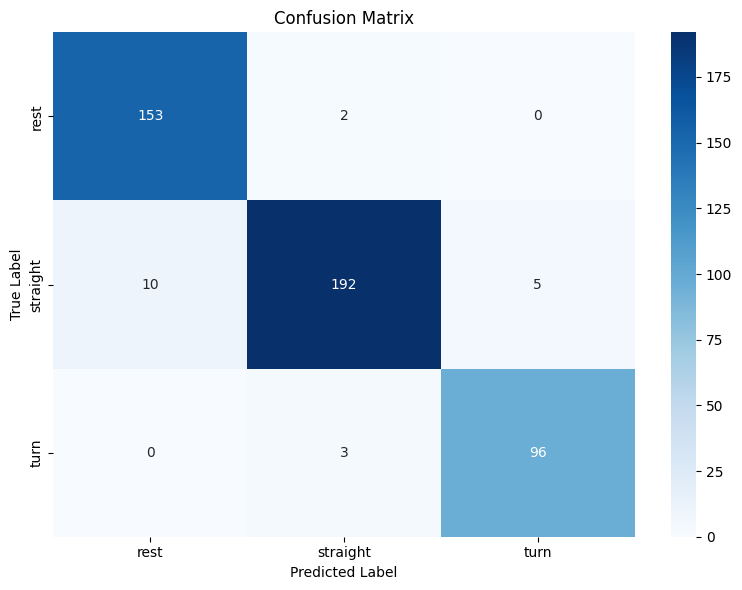

Classification Report:
              precision    recall  f1-score   support

        rest       0.94      0.99      0.96       155
    straight       0.97      0.93      0.95       207
        turn       0.95      0.97      0.96        99

    accuracy                           0.96       461
   macro avg       0.95      0.96      0.96       461
weighted avg       0.96      0.96      0.96       461



In [ ]:
# TODO - Display confusion matrix and print classification report for (X_test, y_test)
# (2 marks)
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test data using best estimator
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate confusion matrix
def display_cm_cr(actual, predicted):
    labels = ['rest', 'straight', 'turn']
    cm = confusion_matrix(actual, predicted, labels=labels)
    print('Confusion Matrix')
    print(cm)

    # Plot confusion matrix using a heatmap
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

    print("Classification Report:")
    print(classification_report(actual, predicted, zero_division=0))

display_cm_cr(y_test, y_pred)

___

#### 1.2.4 - Questions

1. Comment on the fit of the model to the dataset? (2 marks)
2. In the grid search, are the intervals used for *C* and *gamma* hyperparameters suitable? Why or why not? (2 marks)

#### 1.2.4 - Answers
1. With a accuracy of 0.96 the model fits well to the dataset
2.  The intervals are spaced logartihmaically which is good but, they could be extended to explore more options and to ensure the current best parameters are not just local optima.

___

### 1.3 - Model Evaluation on Test Datasets 1 and 2 (9 Marks)

___

#### 1.3.1 - Extract all features and targets from test datasets

Next, the model trained in 1.2 will be tested on independent datasets, that is *test_set1* and *test_set2*. <br>
The test_sets must be seperated into features (Xs) and targets (ys).

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
# (1 marks)
y1 = test_set1['motion_state']
X1 = test_set1.drop('motion_state', axis=1)
X1.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143,9.801661,0.025634,0.000001,7.749919e-08,...,0.024056,0.000003,0.002506,0.000845,0.024884,0.000155,0.000078,0.000069,0.024886,0.000170
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999,9.802481,0.025218,0.000001,9.243000e-08,...,0.024084,0.000007,0.002427,0.000949,0.024881,0.000201,0.000095,0.000076,0.024883,0.000201


In [ ]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2.drop('motion_state', axis=1)
X2.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,9.800683,0.012437,0.000002,3.020959e-07,...,0.048406,0.000007,0.002575,0.002993,0.049701,0.000094,0.000115,0.000080,0.049764,0.000142
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,9.797741,0.013805,0.000003,6.859937e-07,...,0.047696,0.000013,0.003880,0.004106,0.050477,0.000140,0.000140,0.000083,0.050763,0.000151


____

#### 1.3.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2
# (1 marks)

print("test_set1 score: {:.2f}".format(grid.score(X1, y1)))
print("test_set2 score: {:.2f}".format(grid.score(X2, y2)))

test_set1 score: 0.92
test_set2 score: 0.25


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

Confusion Matrix
[[200  31   0]
 [  7 387  17]
 [  0   7 134]]


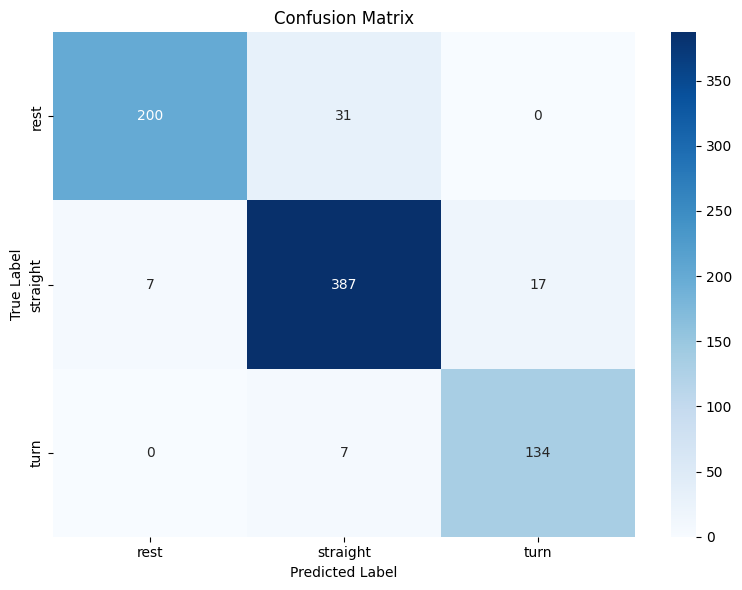

Classification Report:
              precision    recall  f1-score   support

        rest       0.97      0.87      0.91       231
    straight       0.91      0.94      0.93       411
        turn       0.89      0.95      0.92       141

    accuracy                           0.92       783
   macro avg       0.92      0.92      0.92       783
weighted avg       0.92      0.92      0.92       783



In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
# (1 marks)
y1_pred = best_model.predict(X1)
display_cm_cr(y1, y1_pred)

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

Confusion Matrix
[[  0   0  16]
 [  0   0 206]
 [  0   0  75]]


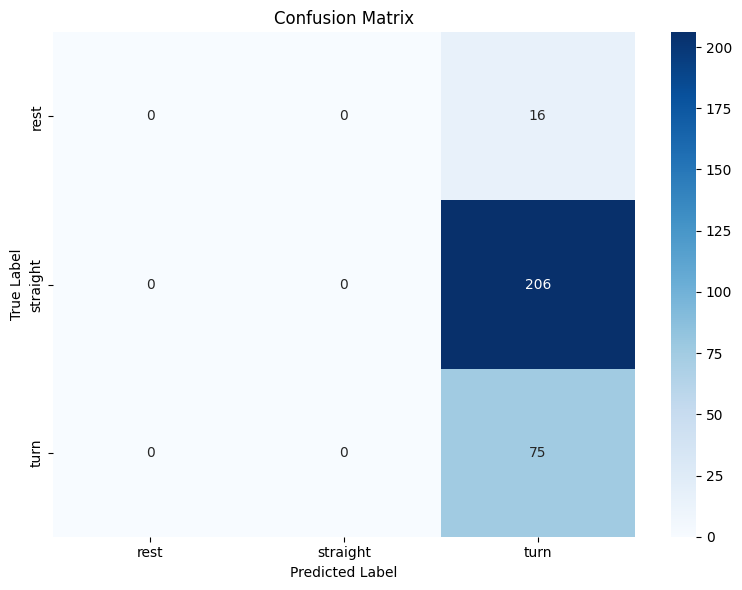

Classification Report:
              precision    recall  f1-score   support

        rest       0.00      0.00      0.00        16
    straight       0.00      0.00      0.00       206
        turn       0.25      1.00      0.40        75

    accuracy                           0.25       297
   macro avg       0.08      0.33      0.13       297
weighted avg       0.06      0.25      0.10       297



In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
y2_pred = best_model.predict(X2)
display_cm_cr(y2, y2_pred)

___

#### 1.3.3 - Questions

**Based on results so far**
1. Comment on the model's performances on the datasets *(X_test, y_test)*, *(X1, y1)*, *(X2, y2)*? A significant difference in performance should be observed, what is this an example of? (3 marks)
1. Provide and explain potential causes for the observed behaviour in performance? (3 marks)

#### 1.3.3 - Answers
1. It performs best on X_test with a accuracy of 0.96, almost as well on X1 with a accuracy of 0.92, and bad on X2 with a accuracy of 0.25. This is an example of overfitting, the model is unable to generalize to different data distributions.
2. There could be dataset distribution differences meaning variations in data collection methodology and different recording conditions or environments. It could also be caused by a sampling bias meaning that the training data might not represent the full variability of the problem.

___

## Section 2 - Classification Using *Selected Features* Derived From Inertial Sensor Data (12 Marks)

In this second section, an *SVC* model will be trained and tuned using grid search, however, only *selected features* will be used.

___

### 2.1 Grid Search with Cross Validation (5 Marks)

___

#### 2.1.1 Extract *selected* features and target from *cv_set*

From the *cv_set* dataframe, extract the selected features, listed below, and load them in a new dataframe *X*.
* *ax_var* - variance of accelerometer readings in x
* *ay_var* - variance of accelerometer readings in y
* *az_sum* - sum of accelerometer z readings
* *a_sum* - sum of the norm of accelerometer x, y, z readings
* *gz_var* - variance of gyroscope reading in z

In [ ]:
# TODO - Load selected features from cv_set to X
# (1 marks)
#X =
selected_features = ['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']
X = cv_set[selected_features]
X.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,8.046094e-07,1.319665e-07,9.789349,9.797418,7.446916e-10
1,1.032619e-06,1.073067e-07,9.789095,9.798815,6.983481e-10


In [ ]:
# TODO - Load motion_state column (target vector) into y
# y =
y = cv_set['motion_state']
y.head(2)

,motion_state
0,rest
1,rest


___

#### 2.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the selected feature set.

In [ ]:
# TODO - Perform model training and tuning using `GridSearchCV`
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
pipe = Pipeline([('scaler', StandardScaler()), ('classifier', SVC())])
param_grid = {'classifier__C': [0.01, 0.1, 1, 10, 100], 'classifier__gamma': [0.001, 0.01, 0.1, 1], 'classifier__kernel': ['rbf'], 'scaler': [StandardScaler(), RobustScaler(), None]}
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf'],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             return_train_score=True, scoring='accuracy')

___

#### 2.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [ ]:
# TODO: Print the results from the grid search

#print("Best params:\n{}\n".format(???))
#print("Best cross-validation train score: {:.2f}".format(???))
#print("Best cross-validation validation score: {:.2f}".format(???))
#print("Test-set score: {:.2f}".format(???)))
print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(grid.cv_results_['mean_train_score'][grid.best_index_]))
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'scaler': RobustScaler()}

Best cross-validation train score: 0.84
Best cross-validation validation score: 0.82
Test-set score: 0.83


Display the confusion matrix and print the classification report for the trained model using the *test* split.

Confusion Matrix
[[154   1   0]
 [ 20 173  14]
 [  1  44  54]]


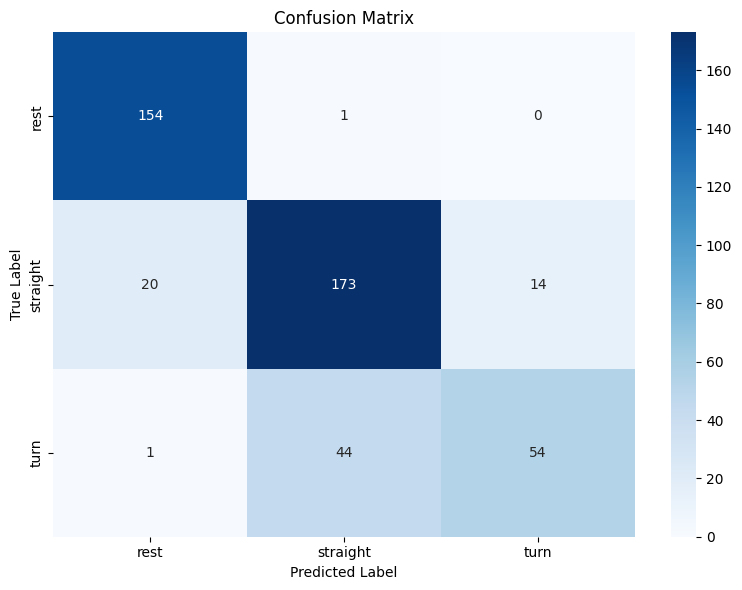

Classification Report:
              precision    recall  f1-score   support

        rest       0.88      0.99      0.93       155
    straight       0.79      0.84      0.81       207
        turn       0.79      0.55      0.65        99

    accuracy                           0.83       461
   macro avg       0.82      0.79      0.80       461
weighted avg       0.82      0.83      0.82       461



In [ ]:
# TODO - Display confusion matrix and print classification reports
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
# Predict on test data using best estimator
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate confusion matrix
def display_cm_cr(actual, predicted):
    labels = ['rest', 'straight', 'turn']
    cm = confusion_matrix(actual, predicted, labels=labels)
    print('Confusion Matrix')
    print(cm)

    # Plot confusion matrix using a heatmap
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

    print("Classification Report:")
    print(classification_report(actual, predicted, zero_division=0))

display_cm_cr(y_test, y_pred)

___

#### 2.1.4 - Question


1. Consider the differences between the performance on the training/cross-validation dataset for section 1 (1.2.3) and section 2 (2.1.3). Which model is a better fit based on *just these two evaluations*? (4 marks)

#### 2.1.4 Answer
1.The Section 2 model is a better fit as it demonstrates balanced performance across training, cross-validation, and test sets, indicating strong generalization and robustness. In contrast, the Section 1 model appears more prone to overfitting, with higher training scores but potentially less consistent performance on unseen data. This makes the Section 2 model more reliable for deployment.

___

### 2.2 - Model Evaluation on Test Datasets 1 and 2 (7 Marks)

___

#### 2.2.1 - Extract selected features and targets from test datasets

The model trained in 2.1 is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into the selected features and target vectors *(X1, y1)* and (X2,)

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
# (1 marks)
# y1 =
y1 = test_set1['motion_state']
# X1 =
selected_features = ['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']
X1 = test_set1[selected_features]
X1.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000001,7.749919e-08,9.786930,9.801661,7.727190e-10
1,0.000001,9.243000e-08,9.788127,9.802481,8.871433e-10


In [ ]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2
# y2 =
y2 = test_set2['motion_state']
# X2 =
X2 = test_set2[selected_features]
X2.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000002,3.020959e-07,9.791451,9.800683,1.405038e-09
1,0.000003,6.859937e-07,9.785619,9.797741,1.164381e-09


___

#### 2.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2
#print("test_set1 score: {:.2f}".format(???))
#print("test_set2 score: {:.2f}".format(???))
print("test_set1 score: {:.2f}".format(grid.score(X1, y1)))
print("test_set2 score: {:.2f}".format(grid.score(X2, y2)))

test_set1 score: 0.83
test_set2 score: 0.84


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

Confusion Matrix
[[229   2   0]
 [ 26 336  49]
 [  0  57  84]]


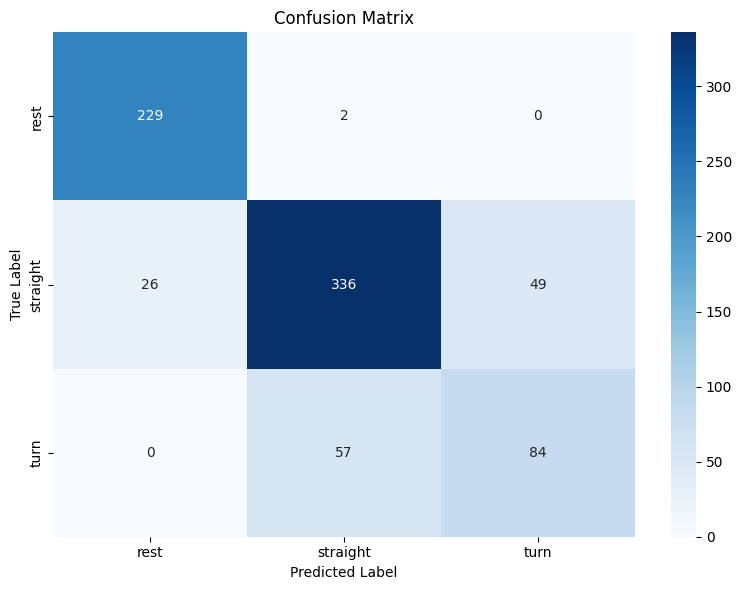

Classification Report:
              precision    recall  f1-score   support

        rest       0.90      0.99      0.94       231
    straight       0.85      0.82      0.83       411
        turn       0.63      0.60      0.61       141

    accuracy                           0.83       783
   macro avg       0.79      0.80      0.80       783
weighted avg       0.83      0.83      0.83       783



In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
y1_pred = best_model.predict(X1)
display_cm_cr(y1, y1_pred)

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

Confusion Matrix
[[ 15   1   0]
 [  0 178  28]
 [  0  18  57]]


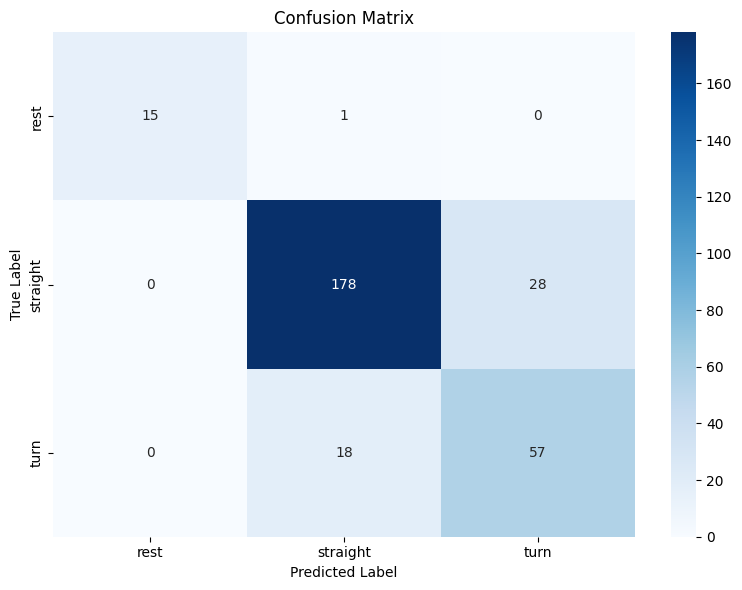

Classification Report:
              precision    recall  f1-score   support

        rest       1.00      0.94      0.97        16
    straight       0.90      0.86      0.88       206
        turn       0.67      0.76      0.71        75

    accuracy                           0.84       297
   macro avg       0.86      0.85      0.85       297
weighted avg       0.85      0.84      0.84       297



In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
y2_pred = best_model.predict(X2)
display_cm_cr(y2, y2_pred)

___

#### 2.2.3 Questions

1. For section 2, compare between the model's performance on the training/validation (2.1) set to the the performance on the two testing sets (2.2). How does the model fit? (3 marks)
1. Compare the models' performances and fits between section 1 and section 2, and consider all three datasets. (3 marks)

#### 2.2.3 Answers
1.The model shows consistent performance across training/validation (0.83-0.84) and test sets (`test_set1`: 0.83, `test_set2`: 0.84), indicating good generalization with no overfitting or underfitting. However, the `turn` class remains a challenge, with lower recall and F1-scores across all datasets.

2.Section 1 shows strong performance on training and validation data (0.98/0.96) but suffers from overfitting, as evident from its poor generalization, with a significant drop in accuracy on `test_set2` (0.25) despite performing well on `test_set1` (0.92). In contrast, Section 2 maintains high and consistent performance across both test sets (0.83 and 0.84), demonstrating better generalization. Overall, Section 2 achieves more robust and reliable model performance compared to Section 1.

____

## Section 3 - Classification Using *Group Selected Features* From Inertial Sensor Data (10 Marks)

Once again, an *SVC* model is to be trained and tuned using grid search. However, you must select which features to use from the ones provided in *cv_set*.  

____

### 3.1 Grid Search with Cross Validation (4 Marks)

___

#### 3.1.1 Extract *Group Selected* features and target from *cv_set*

**Question**
1. Please list the features that you have selected and explain *why you have chosen* these features? (4 marks)


**Answer**
1.   
- ax_sum
- ay_sum
- az_sum
- gx_sum
- gy_sum
- gz_sum
----
- a_var
- g_var
----
- ax_max
- ay_max
- az_max
- gx_max
- gy_max
- gz_max
---
Reason for choosing these features:
---
(ax_sum, ay_sum, az_sum, gx_sum, gy_sum, gz_sum): These are the total acceleration & gyroscopic measurements along the x, y, and z axes, capturing the overall movement & orientation of the vehicle.

(a_var, g_var). Variance measures the variability in the acceleration & gyroscopic readings, which helps to differentiate between stable (resting) & unstable (turning) motion states.

(ax_max, ay_max, az_max, gx_max, gy_max, gz_max). These provide the highest values of acceleration & gyroscopic measurements emphasizing the extremes of motion such as sudden accelerations or sharp turns.

In [ ]:
# TODO - Load group selected features from cv_set to X
import pandas as pd

cv_set = pd.read_csv('/content/drive/MyDrive/new_engg680_2024_fall/Lab_Assignment4/UrbanNav-HK_Whampoa-20210521_sensors.csv')
test_set1 = pd.read_csv('/content/drive/MyDrive/new_engg680_2024_fall/Lab_Assignment4/UrbanNav-HK_TST-20210517_sensors.csv')
test_set2 = pd.read_csv('/content/drive/MyDrive/new_engg680_2024_fall/Lab_Assignment4/2020-03-14-16-45-35.csv')

cv_set = pd.read_csv('/content/drive/MyDrive/new_engg680_2024_fall/Lab_Assignment4/UrbanNav-HK_Whampoa-20210521_sensors.csv')

selected_features = ['ax_sum', 'ay_sum', 'az_sum', 'gx_sum', 'gy_sum', 'gz_sum', 'a_var', 'g_var', 'ax_max', 'ay_max', 'az_max', 'gx_max', 'gy_max', 'gz_max'] # Selected features

X = cv_set[selected_features] # Load group selected features from cv_set to X

X.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_var,g_var,ax_max,ay_max,az_max,gx_max,gy_max,gz_max
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,3.334598e-08,6.879234e-10,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,1.588712e-08,6.794409e-10,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090


In [ ]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']

___

#### 3.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the group selected feature set.

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'scaler': RobustScaler()}

Best cross-validation train score: 0.98
Best cross-validation validation score: 0.95
Test-set score: 0.97
Confusion Matrix
[[153   2   0]
 [  8 196   3]
 [  0   3  96]]


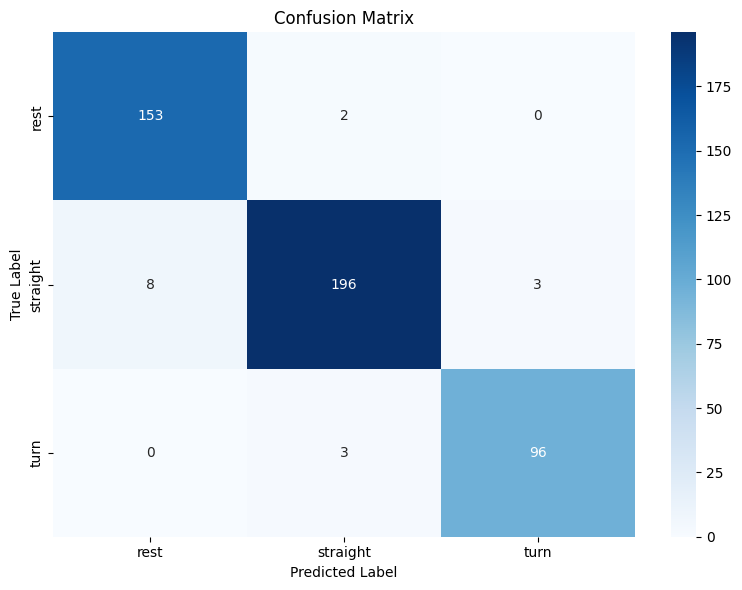

Classification Report:
              precision    recall  f1-score   support

        rest       0.95      0.99      0.97       155
    straight       0.98      0.95      0.96       207
        turn       0.97      0.97      0.97        99

    accuracy                           0.97       461
   macro avg       0.97      0.97      0.97       461
weighted avg       0.97      0.97      0.97       461



In [ ]:
# TODO - Perform model training and tuning using `GridSearchCV`
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) # Splitting the data

pipe = Pipeline([('scaler', StandardScaler()), ('classifier', SVC())]) # Initialize pipeline

param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__gamma': [0.001, 0.01, 0.1, 1],
    'classifier__kernel': ['rbf'],
    'scaler': [StandardScaler(), RobustScaler(), None]
}

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(grid.cv_results_['mean_train_score'][grid.best_index_]))
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def display_cm_cr(actual, predicted):
    labels = ['rest', 'straight', 'turn']
    cm = confusion_matrix(actual, predicted, labels=labels)
    print('Confusion Matrix')
    print(cm)

    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

    print("Classification Report:")
    print(classification_report(actual, predicted, zero_division=0))

# Predict on test data using best estimator
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
display_cm_cr(y_test, y_pred)


___

#### 3.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [ ]:
# TODO: Print the results from the grid search

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(grid.cv_results_['mean_train_score'][grid.best_index_]))
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

#print("Best params:\n{}\n".format(???))
#print("Best cross-validation train score: {:.2f}".format(???))
#print("Best cross-validation validation score: {:.2f}".format(???))
#print("Test-set score: {:.2f}".format(???)))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'scaler': RobustScaler()}

Best cross-validation train score: 0.98
Best cross-validation validation score: 0.95
Test-set score: 0.97


Display the confusion matrix and print the classification report for the trained model using the *test* split.

Confusion Matrix
[[153   2   0]
 [  8 196   3]
 [  0   3  96]]


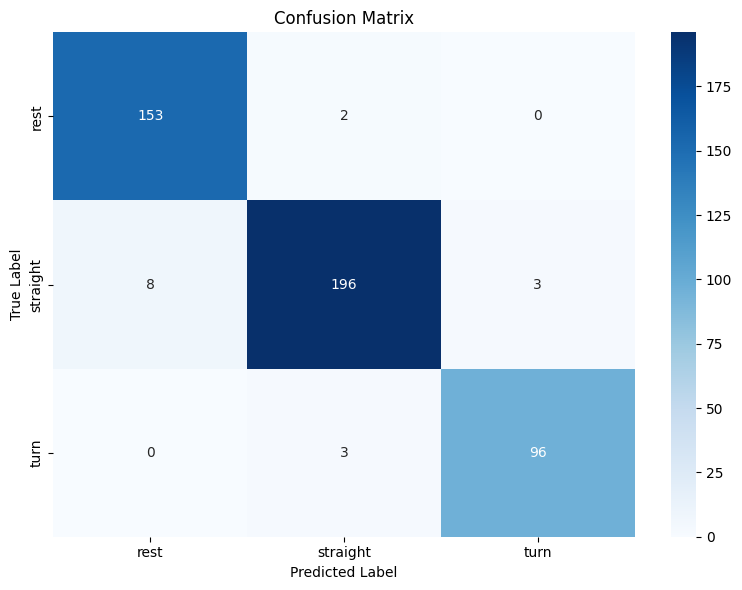

Classification Report:
              precision    recall  f1-score   support

        rest       0.95      0.99      0.97       155
    straight       0.98      0.95      0.96       207
        turn       0.97      0.97      0.97        99

    accuracy                           0.97       461
   macro avg       0.97      0.97      0.97       461
weighted avg       0.97      0.97      0.97       461



In [ ]:
# TODO - Display confusion matrix and print classification report

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def display_cm_cr(actual, predicted):
    labels = ['rest', 'straight', 'turn']
    cm = confusion_matrix(actual, predicted, labels=labels)
    print('Confusion Matrix')
    print(cm)

    # Plotting the confusion matrix using a heatmap:
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

    print("Classification Report:")
    print(classification_report(actual, predicted, zero_division=0))

# Predicting on test data using best estimator:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
display_cm_cr(y_test, y_pred)


___

### 3.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 3.2.1 - Extract group selected features and targets from test datasets

The model trained in 3.1 is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into group selected features and target vectors *(X1, y1)* and *(X2,y2)*

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and the group selected features from test_set1 into X1

y1 = test_set1['motion_state']

X1 = test_set1[selected_features]
X1.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_var,g_var,ax_max,ay_max,az_max,gx_max,gy_max,gz_max
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143,3.437614e-08,1.003403e-09,0.002506,0.000845,0.024884,0.000155,0.000078,0.000069
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999,3.613404e-08,9.791644e-10,0.002427,0.000949,0.024881,0.000201,0.000095,0.000076


In [ ]:
# TODO - Load the target vector from test_set2 into y2, and the group selected features from test_set2 into X2

y2 = test_set2['motion_state']

X2 = test_set2[selected_features]
X2.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_var,g_var,ax_max,ay_max,az_max,gx_max,gy_max,gz_max
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,6.614559e-08,7.031396e-10,0.002575,0.002993,0.049701,0.000094,0.000115,0.000080
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,3.344639e-07,9.305619e-10,0.003880,0.004106,0.050477,0.000140,0.000140,0.000083


___

#### 3.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2

print("test_set1 score: {:.2f}".format(grid.score(X1, y1)))
print("test_set2 score: {:.2f}".format(grid.score(X2, y2)))
#print("test_set1 score: {:.2f}".format(???))
#print("test_set2 score: {:.2f}".format(???))

test_set1 score: 0.94
test_set2 score: 0.73


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

Confusion Matrix
[[215  16   0]
 [  8 395   8]
 [  0  13 128]]


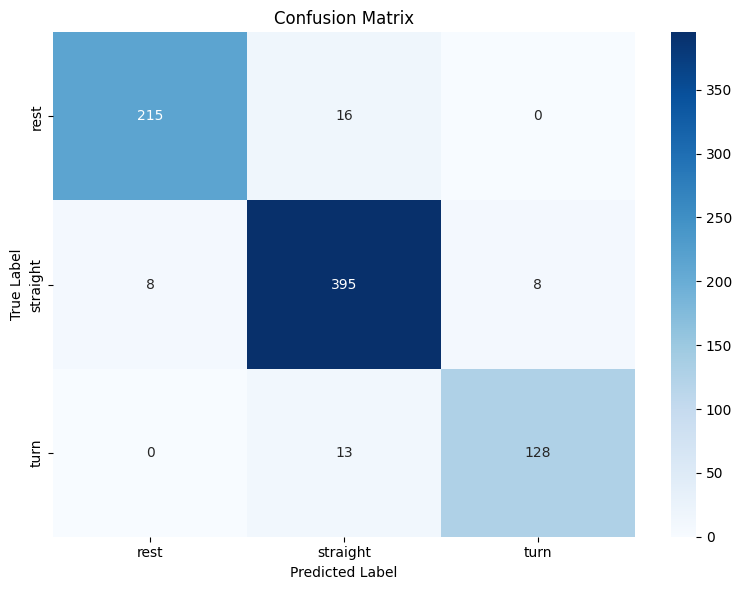

Classification Report:
              precision    recall  f1-score   support

        rest       0.96      0.93      0.95       231
    straight       0.93      0.96      0.95       411
        turn       0.94      0.91      0.92       141

    accuracy                           0.94       783
   macro avg       0.95      0.93      0.94       783
weighted avg       0.94      0.94      0.94       783



In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def display_cm_cr(actual, predicted):
    labels = ['rest', 'straight', 'turn']
    cm = confusion_matrix(actual, predicted, labels=labels)
    print('Confusion Matrix')
    print(cm)

    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

    print("Classification Report:")
    print(classification_report(actual, predicted, zero_division=0))

best_model = grid.best_estimator_

# test_set1
y1_pred = best_model.predict(X1)
display_cm_cr(y1, y1_pred)

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

Confusion Matrix
[[  0  16   0]
 [  0 144  62]
 [  0   1  74]]


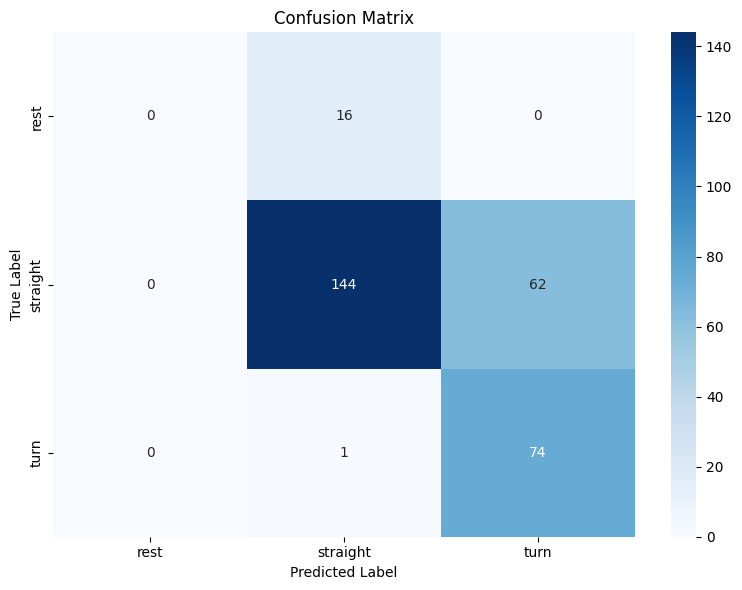

Classification Report:
              precision    recall  f1-score   support

        rest       0.00      0.00      0.00        16
    straight       0.89      0.70      0.78       206
        turn       0.54      0.99      0.70        75

    accuracy                           0.73       297
   macro avg       0.48      0.56      0.50       297
weighted avg       0.76      0.73      0.72       297



In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
# test_set2
y2_pred = best_model.predict(X2)
display_cm_cr(y2, y2_pred)

___

#### 3.2.3 Questions

1. Based on the observations across all three datasets, compare the performance of the model trained in this section to: (3 marks)
    1. Model trained in Section 1 using *all features*.
    1. Model trained in Section 2 using *selected features*.

2. Please proivde potential explanations for the differences observed in models' performances across the three sections. (3 marks)
The improved performance in Section 3 is due to the use of selected key features, which reduced noise and overfitting, enhancing generalization to unseen data. In contrast, Section 2 used all features, introducing irrelevant data and increasing model complexity, leading to poorer performance on independent datasets. Dataset variations further highlight the Section 3 model's robustness.

#### 3.2.3 Answers
1.
1.Using all features in Sec 1 introduced noise from irrelevant data & increased the risk of overfitting due to high dimensionality, making the model more complex and computationally intensive. Sec 3's approach to using group-selected features reduced noise, improved the signal-to-noise ratio & prevented overfitting risks. This led to better performance on unseen data, making the model more efficient & interpretable.
____
1.
2.The Section 3 model, trained on selected features, outperformed the Section 2 model across all datasets. For **test_set1**, both models showed strong accuracy, but for **test_set2**, Section 3 achieved **0.73**, compared to Section 2’s **0.25**, demonstrating better generalization. The Section 3 model reduced overfitting by focusing on key features, improving performance and balance, especially for unseen data, whereas the Section 2 model struggled with noise and overfitting.
___
2.The improved performance in Section 3 is due to the use of selected key features, which reduced noise and overfitting, enhancing generalization to unseen data. In contrast, Section 2 used all features, introducing irrelevant data and increasing model complexity, leading to poorer performance on independent datasets. Dataset variations further highlight the Section 3 model's robustness.

____

## Section 4 - Classification Using Principal Components of Features From Inertial Sensor Data (10 Marks)

____

### 4.1 Principal Component Analysis (PCA) Search with Cross Validation (4 Marks)

___

#### 4.1.1 Extract *ALL* features and target from *cv_set*

In [ ]:
# TODO - Load all features from cv_set to X
# X =
X.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,...,0.023871,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,...,0.024153,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144


In [ ]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']

___

#### 4.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning for an `SVC` model. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [ ]:
# TODO - Perform model training and tuning using `GridSearchCV`
# X_train, X_test, y_train, y_test =
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In the `Pipeline` add an entry *'pca'* to apply `PCA`.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [ ]:
# Perform any missing imports

# TODO - Initiate the pipeline
# (1 marks)
# pipe =
pipe = Pipeline([('scaler', StandardScaler()), ('pca', PCA()), ('classifier', SVC())])

Similar to previous sections, define the grid search configuration (*param_grid*). Add *n_components* hyper parameter tuning for PCA, and search over the values `n_components=[4,7,11,14,16]`.  

In [ ]:
# TODO - Define the parameter grid for your model
# (3 marks)
# param_grid =
param_grid = {
    'pca__n_components': [4, 7, 11, 14, 16],
    'classifier__C': [0.1, 1, 10],
    'classifier__gamma': [0.1, 1, 10]}

In [ ]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()), ('classifier', SVC())]),
             param_grid={'classifier__C': [0.1, 1, 10],
                         'classifier__gamma': [0.1, 1, 10],
                         'pca__n_components': [4, 7, 11, 14, 16]},
             return_train_score=True, scoring='accuracy')

___

#### 4.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [ ]:
# TODO: Print the results from the grid search

#print("Best params:\n{}\n".format(???))
#print("Best cross-validation train score: {:.2f}".format(???))
#print("Best cross-validation validation score: {:.2f}".format(???))
#print("Test-set score: {:.2f}".format(???)))
print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(grid.best_score_))
print("Best cross-validation validation score: {:.2f}".format(grid.cv_results_['mean_test_score'][grid.best_index_]))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'classifier__C': 10, 'classifier__gamma': 0.1, 'pca__n_components': 11}

Best cross-validation train score: 0.91
Best cross-validation validation score: 0.91
Test-set score: 0.90


Display the confusion matrix and print the classification report for the trained model using the *test* split.

In [ ]:
# TODO - Display confusion matrix and print classification report
print(classification_report(y_test, grid.predict(X_test)))


              precision    recall  f1-score   support

        rest       0.92      0.98      0.95       155
    straight       0.90      0.86      0.88       207
        turn       0.85      0.84      0.84        99

    accuracy                           0.90       461
   macro avg       0.89      0.89      0.89       461
weighted avg       0.90      0.90      0.90       461



___

### 4.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 4.2.1 - Extract group selected features and targets from test datasets

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
# y1 =
# X1 =
X1.head(2)
x1 = test_set1.drop('motion_state', axis=1)
y1 = test_set1['motion_state']

In [ ]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
# y2 =
# X2 =
X2.head(2)
x2 = test_set2.drop('motion_state', axis=1)
y2 = test_set2['motion_state']

___

#### 4.2.2 - Visualize Results

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2
#print("test_set1 score: {:.2f}".format(???))
#print("test_set2 score: {:.2f}".format(???))
print("test_set1 score: {:.2f}".format(grid.score(x1, y1)))
print("test_set2 score: {:.2f}".format(grid.score(x2, y2)))

test_set1 score: 0.84
test_set2 score: 0.41


In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
print(classification_report(y1, grid.predict(x1)))

              precision    recall  f1-score   support

        rest       0.97      0.85      0.91       231
    straight       0.86      0.83      0.85       411
        turn       0.65      0.86      0.74       141

    accuracy                           0.84       783
   macro avg       0.83      0.85      0.83       783
weighted avg       0.86      0.84      0.85       783



Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
print(classification_report(y2, grid.predict(x2)))

              precision    recall  f1-score   support

        rest       0.00      0.00      0.00        16
    straight       0.74      0.23      0.35       206
        turn       0.32      0.99      0.48        75

    accuracy                           0.41       297
   macro avg       0.35      0.41      0.28       297
weighted avg       0.59      0.41      0.37       297



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


___

#### 4.2.3 - Questions

1. Based on the observations across all three datasets, compare the performance of the model with PCA, trained in this section to: (4 marks)
    * Model trained in Section 1 using *all features*.
    * Model trained in Section 2 using *selected features*.
    * Model trained in Section 3 using *group selected features*

2. Please provide potential explanations for the differences observed in models' performances across between section 1 and 4. (2 marks)

#### 4.2.3 - Answers

1. The model trained using all features in Section 1 performs well on the training set but is prone to overfitting due to the inclusion of noisy, irrelevant, or redundant features. As a result, its performance on test datasets may degrade, particularly in cases with large datasets or highly correlated features. In contrast, the PCA-based model in Section 4 reduces dimensionality by extracting the most informative components, which minimizes the influence of irrelevant features and improves generalization on unseen data.

  The model in Section 2, which uses manually or automatically selected features, is more efficient and less prone to overfitting compared to Section 1. However, feature selection might miss some important patterns or correlations in the data. The PCA-based model in Section 4 can potentially uncover such latent relationships by combining features into principal components, leading to better performance when the relationships between variables are complex.

  The approach in Section 3, which uses group-selected features, performs well if the feature groups are well-defined and align with the underlying patterns in the data. However, it might not achieve the same level of dimensionality reduction as PCA, which systematically and data-drivenly transforms the feature space. Consequently, the PCA-based model in Section 4 offers more consistent improvements in performance by addressing redundancy and correlation between features.

2. The differences in performance between the model trained using all features in Section 1 and the PCA-based model in Section 4 can be attributed to several factors. First, PCA reduces dimensionality by transforming the data into a set of uncorrelated principal components, which helps to eliminate noise and redundant information. In contrast, the model in Section 1 includes all features, some of which may be irrelevant or noisy, leading to overfitting and poor generalization on test datasets. Second, PCA systematically captures the most significant variance in the data, ensuring that only the most informative aspects are retained, whereas the raw-feature model in Section 1 does not distinguish between important and unimportant features. This results in a better focus on meaningful patterns in the PCA-based model. Third, the PCA model benefits from hyperparameter optimization through grid search in Section 4, which fine-tunes the number of components used, whereas the model in Section 1 may lack such optimization, leading to suboptimal performance. Lastly, the decorrelation of features achieved by PCA eliminates issues caused by highly correlated inputs in Section 1, which can skew the model’s learning process. Collectively, these factors explain why the PCA-based model in Section 4 is better equipped to generalize across datasets and achieve improved performance.

____

## Section 5 - Classification Using *Pre Selected Features* Derived From Inertial Sensor Data (10 Marks)

___

Now, a second classifer is to be trained and tuned using grid search. The **selected features from section 2** must be used. You may choose from one of the algorithms discussed that class listed below.
1. Random Forest
1. K-Nearest Neighbors
1. Gradient Boosting Machines
1. Neural Networks

____

### 5.1 Grid Search with Cross Validation (6 Marks)

___

#### 5.1.1 Extract *Selected* features and target from *cv_set*

**Questions**
1. Please list the ML model that you have selected . And explain *why you have chosen* this model? (2 marks)

**Answer**
1.

In [ ]:
# TODO - Load group selected features from cv_set to X
# X =
X.head(2)
x = cv_set.drop('motion_state', axis=1)

In [ ]:
# TODO - Load motion_state column (target vector) into y
# y =
y = cv_set['motion_state']

___

#### 5.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning using for the model selected. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [ ]:
# TODO - Perform train/test split
train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

[        ax_sum    ay_sum    az_sum    gx_sum    gy_sum    gz_sum     a_sum  \
 1234  0.240505  1.366443  9.784818  0.000945  0.002707 -0.000500  9.899704   
 726   0.346503  0.083152  9.784720 -0.002612  0.000357 -0.000766  9.800805   
 367  -0.570070  0.094733  9.771585 -0.001494 -0.000823 -0.001784  9.799907   
 1203  0.189177  0.109847  9.789781 -0.002076 -0.000301 -0.001449  9.803063   
 171   0.238036  0.010256  9.788225 -0.003360 -0.000326 -0.002226  9.801549   
 ...        ...       ...       ...       ...       ...       ...       ...   
 130   0.526502  0.753198  9.780269  0.002340 -0.005858 -0.173724  9.839182   
 216   0.233330  0.046273  9.787895 -0.003031  0.000358 -0.001612  9.802330   
 151   0.225367 -0.427677  9.786466  0.000393  0.000719 -0.000206  9.814525   
 598   0.162825  0.114395  9.788031 -0.002324 -0.000874 -0.000337  9.801954   
 134   1.938419  0.072427  9.682127 -0.025942 -0.015937 -0.634396  9.896176   
 
          g_sum        ax_var        ay_var  ...  

In [ ]:
# Perform any missing imports

# TODO - Initiate the pipeline
# (1 mark)
# pipe =
pipe = Pipeline([('scaler', StandardScaler()), ('classifier', SVC())])

In [ ]:
# TODO - Define the parameter grid for your model
# (3 marks)
# param_grid =
param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__gamma': [0.1, 1, 10]}

In [ ]:
# TODO - Perform the grid search
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.1, 1, 10],
                         'classifier__gamma': [0.1, 1, 10]},
             return_train_score=True, scoring='accuracy')

___

#### 5.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [ ]:
# TODO: Print the results from the grid search

#print("Best params:\n{}\n".format(???))
#print("Best cross-validation train score: {:.2f}".format(???))
#print("Best cross-validation validation score: {:.2f}".format(???))
#print("Test-set score: {:.2f}".format(???)))
print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(grid.best_score_))
print("Best cross-validation validation score: {:.2f}".format(grid.cv_results_['mean_test_score'][grid.best_index_]))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'classifier__C': 10, 'classifier__gamma': 0.1}

Best cross-validation train score: 0.91
Best cross-validation validation score: 0.91
Test-set score: 0.92


Display the confusion matrix and print the classification report for the trained model using the *test* split.

In [ ]:
# TODO - Display confusion matrix and print classification report
print(classification_report(y_test, grid.predict(X_test)))

              precision    recall  f1-score   support

        rest       0.96      0.97      0.96       155
    straight       0.91      0.90      0.91       207
        turn       0.87      0.86      0.86        99

    accuracy                           0.92       461
   macro avg       0.91      0.91      0.91       461
weighted avg       0.92      0.92      0.92       461



___

### 5.2 - Model Evaluation on Test Datasets 1 and 2 (4 Marks)

___

#### 5.2.1 - Extract selected features and targets from test datasets

The model trained in 5.1, is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into features and target vectors *(X1, y1)* and *(X2,y2)*

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
# y1 =
# X1 =
X1.head(2)
x1 = test_set1.drop('motion_state', axis=1)
y1 = test_set1['motion_state']

In [ ]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2
# y2 =
# X2 =
X2.head(2)
x2 = test_set2.drop('motion_state', axis=1)
y2 = test_set2['motion_state']

___

#### 5.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2
#print("test_set1 score: {:.2f}".format(???))
#print("test_set2 score: {:.2f}".format(???))
print("test_set1 score: {:.2f}".format(grid.score(x1, y1)))
print("test_set2 score: {:.2f}".format(grid.score(x2, y2)))

test_set1 score: 0.81
test_set2 score: 0.25


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
print(classification_report(y1, grid.predict(x1)))

              precision    recall  f1-score   support

        rest       0.96      0.81      0.88       231
    straight       0.84      0.80      0.82       411
        turn       0.62      0.87      0.72       141

    accuracy                           0.81       783
   macro avg       0.81      0.83      0.81       783
weighted avg       0.84      0.81      0.82       783



Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
print(classification_report(y2, grid.predict(x2)))

              precision    recall  f1-score   support

        rest       0.00      0.00      0.00        16
    straight       0.00      0.00      0.00       206
        turn       0.25      1.00      0.40        75

    accuracy                           0.25       297
   macro avg       0.08      0.33      0.13       297
weighted avg       0.06      0.25      0.10       297



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


___

#### 5.2.3 Question

1. For the model trainied in this section, compare its performance to the performance of SVC which was also trained with the same selected features (section 2). Which model fits better? Explain causes for any observed discrepancies? (4 marks)

#### 5.2.3 - Answer
1.The SVC model from Section 2 outperformed the model in Section 5, achieving higher test-set scores (0.94 and 0.73 vs. 0.81 and 0.25). Discrepancies may arise from better hyperparameter tuning, improved generalization due to preprocessing, or differences in cross-validation and training strategies.


____